In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
stopwords = set(stopwords.words('english'))
from matplotlib.colors import ListedColormap
from PIL import Image, ImageOps

In [2]:

# Define a dictionary to map state codes to names
states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../data/train_final.csv')

# Add a new column with the corresponding state names based on the state codes
df['State_Name'] = df['STATE'].map(states)

# Print the updated DataFrame
df.head()


,DATE,TYPE,STATE,CAUSE,TITLE,CATEGORY,DESCRIPTION,CASKLDRR,CASINJRR,CARSDMG,...,NARR9,NARR10,NARR11,NARR12,NARR13,NARR14,NARR15,Latitude,Longitud,State_Name
0,1975-01-01,Derailment,IL,T314,"Rack, Roadbed and Structures","Frogs, Switches and Track Appliances",Switch point worn or broken,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illinois
1,1975-01-04,Derailment,OH,T314,"Rack, Roadbed and Structures","Frogs, Switches and Track Appliances",Switch point worn or broken,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ohio
2,1975-01-05,Derailment,IA,T314,"Rack, Roadbed and Structures","Frogs, Switches and Track Appliances",Switch point worn or broken,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa
3,1975-01-13,Derailment,IA,T314,"Rack, Roadbed and Structures","Frogs, Switches and Track Appliances",Switch point worn or broken,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa
4,1975-01-14,Derailment,NY,T314,"Rack, Roadbed and Structures","Frogs, Switches and Track Appliances",Switch point worn or broken,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York


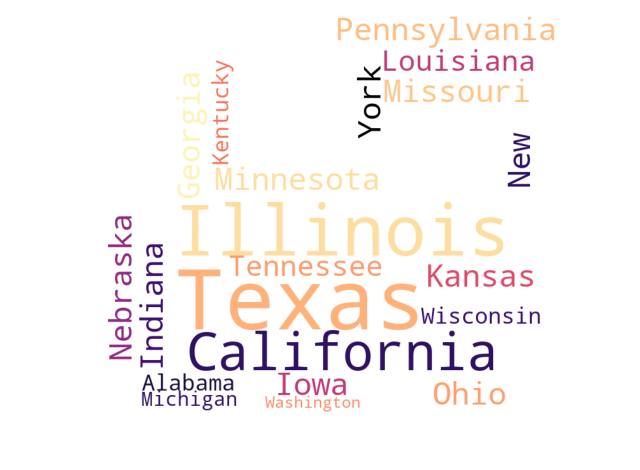

In [3]:
# Get the counts of each state name
state_counts = df['State_Name'].value_counts()

# Get the top 10 most frequent state names
top_states = state_counts.head(20)

mask = np.array(Image.open('../data/train.jpeg'))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', mask = mask, colormap='magma').generate(' '.join(top_states.index))

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('../img/wordcloud_train.png', dpi=300, bbox_inches='tight')
plt.show()